## Bank Customer prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import plot_tree
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [5]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#Model to predict churn rate(wether they will leave the bank or not)

In [7]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [13]:
# Relationship between credit score and churn 

<Axes: xlabel='churn', ylabel='credit_score'>

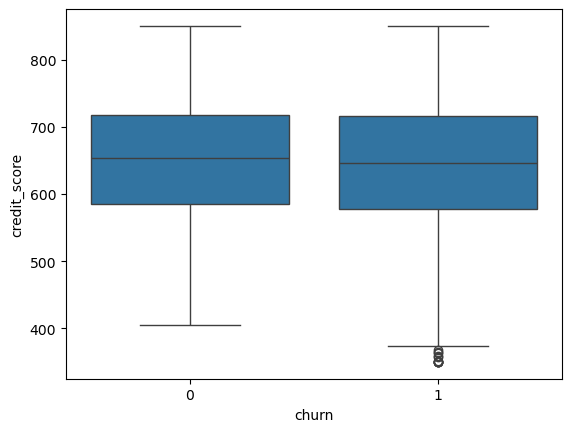

In [14]:
sns.boxplot(data=data,x='churn',y='credit_score')
#Shows that the slightly lower credit score has a higher churn rate

In [15]:
data['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='country,churn'>

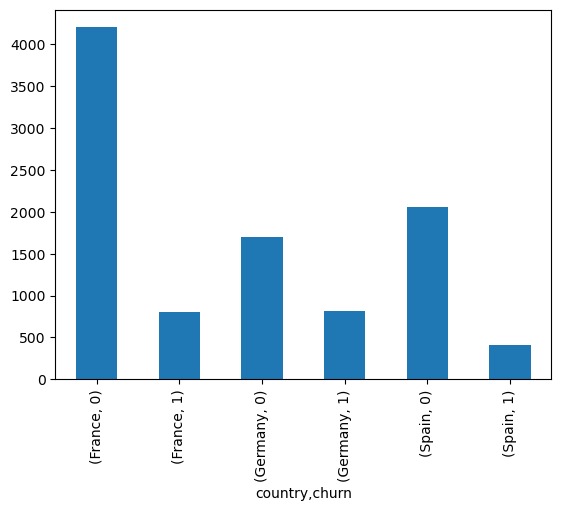

In [16]:
data.groupby('country')['churn'].value_counts().plot(kind='bar')
#Almost 50% of german customers are leaving, spain and france have a small likely hood of leaving,
# less than 20 % for French and Spanish

In [17]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Gender effect
print(data.groupby('gender')['churn'].value_counts())

females_no_churn = 3404
females_churn = 1139
males_no_churn = 4559
males_churn = 898

total_females = females_no_churn + females_churn
total_males = males_no_churn + males_churn

female_churn_rate = (females_churn / total_females) * 100
male_churn_rate = (males_churn / total_males) * 100

print(f'Female churn rate is {female_churn_rate:.2f}%')
print(f'Male churn rate is {male_churn_rate:.2f}%')

gender  churn
Female  0        3404
        1        1139
Male    0        4559
        1         898
Name: count, dtype: int64
Female churn rate is 25.07%
Male churn rate is 16.46%


In [19]:
#Females more likely to leave bank

In [20]:
data['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

<Axes: xlabel='tenure,churn'>

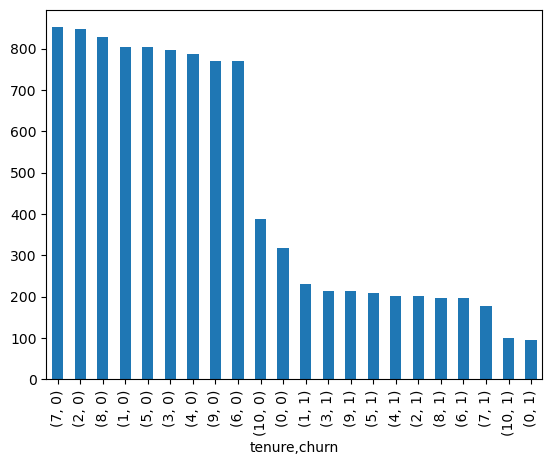

In [21]:
data.groupby('tenure')['churn'].value_counts().sort_values(ascending = False).plot(kind='bar')

In [22]:
#Not really in order but clearly the longer you stay with them the less likely you are to leave
#7 years most likely you'll stay with them

<Axes: xlabel='churn', ylabel='balance'>

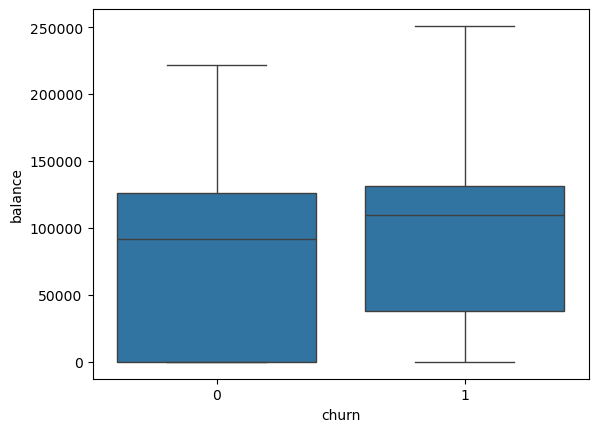

In [23]:
#balance 
sns.boxplot(data=data,x='churn',y='balance')

In [24]:
#suprising, people with more money churned(left) rather than people people with less money stayed with company
#Could be that there are better banks/deals for people that have more money, driving them to switch banks

In [25]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
#Product number - would expect to see more products == less likely to leave
data.groupby('products_number')['churn'].value_counts()

products_number  churn
1                0        3675
                 1        1409
2                0        4242
                 1         348
3                1         220
                 0          46
4                1          60
Name: count, dtype: int64

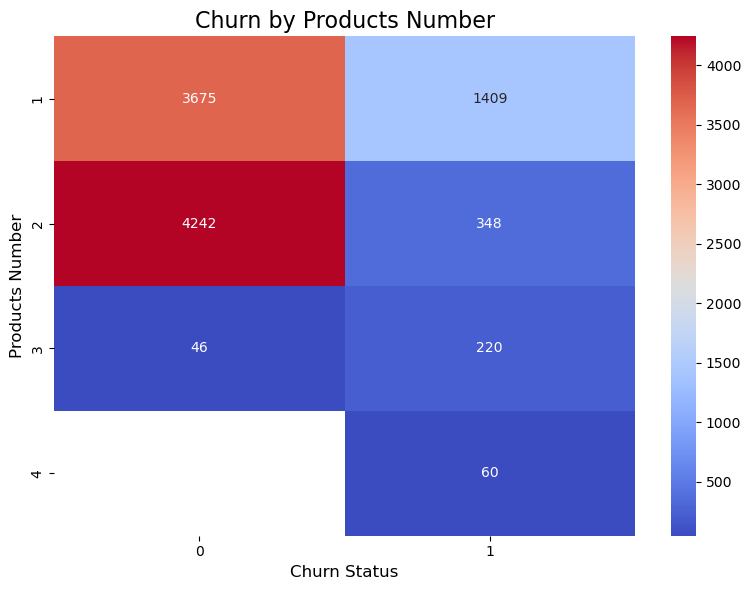

In [27]:
heatmap_data = data.groupby(['products_number', 'churn']).size().reset_index(name='Count')

heatmap_pivot = heatmap_data.pivot(index='products_number', columns='churn', values='Count')

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_pivot,
    annot=True,       
    cmap='coolwarm',  
    fmt='.0f',       
    cbar=True         
)
plt.title('Churn by Products Number', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Products Number', fontsize=12)
plt.tight_layout()
plt.show()

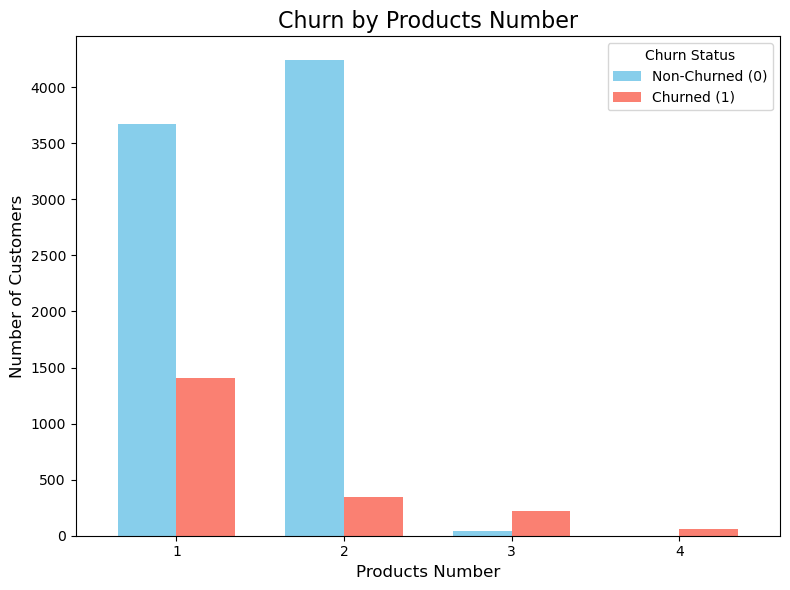

In [28]:

bar_data = data.groupby(['products_number', 'churn']).size().reset_index(name='Count')
bar_pivot = bar_data.pivot(index='products_number', columns='churn', values='Count').fillna(0)

bar_pivot.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'], width=0.7)

# Add labels and title
plt.title('Churn by Products Number', fontsize=16)
plt.xlabel('Products Number', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(['Non-Churned (0)', 'Churned (1)'], title='Churn Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# Clear corralation here, not sure about 3 and 4 though as they brake the mould, more people churning with more products interestingly

<Axes: xlabel='credit_card,churn'>

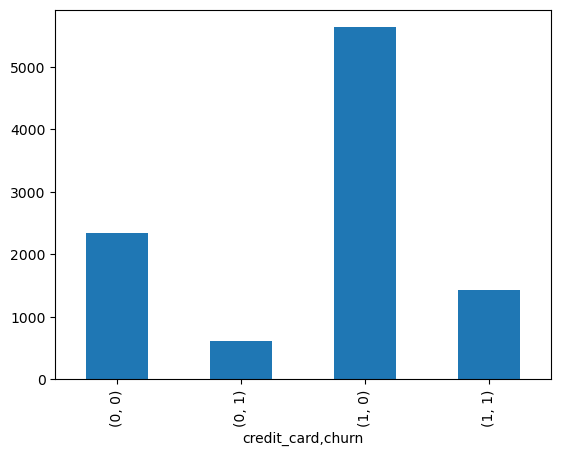

In [30]:
data.groupby('credit_card')['churn'].value_counts().plot(kind='bar')

In [31]:
#if you have one your less likely to go
#not having one and staying is high also

In [32]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='active_member,churn'>

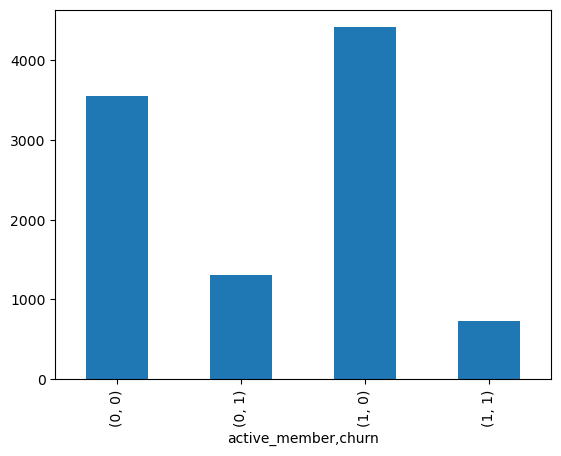

In [33]:
data.groupby('active_member')['churn'].value_counts().plot(kind='bar')

In [34]:
#Does not reveal much here

<Axes: xlabel='churn'>

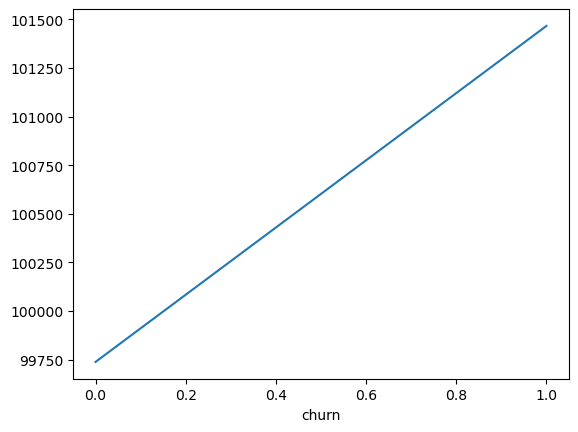

In [35]:
data.groupby('churn')['estimated_salary'].mean().plot(kind='line')

<Axes: xlabel='churn', ylabel='estimated_salary'>

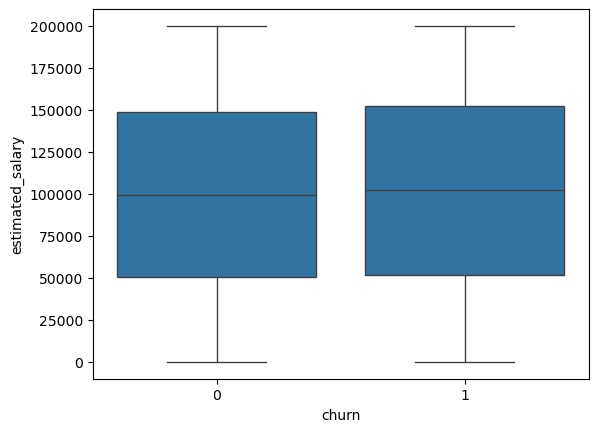

In [36]:
sns.boxplot(data=data,x='churn',y='estimated_salary')

In [37]:
#Pretty equal, more likely to stay with less money which supports earlier point

In [38]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
data = data.drop('customer_id', axis=1)

In [40]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [41]:
oe = OrdinalEncoder()

oe.fit(data[['country','gender']])

OrdinalEncoder()

In [42]:
data[['country','gender']] = oe.transform(data[['country','gender']])

In [43]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


In [44]:
X = data.iloc[:,:-1]
Y = data['churn']

In [45]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [46]:
X_scaller = StandardScaler()
Y_scaller = StandardScaler()

In [47]:
#Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 23)

In [48]:
# Initialize SMOTE - resampling the data due to churn imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution in resampled training data
print("\nClass distribution after applying SMOTE:")
print(y_train_resampled.value_counts())


Class distribution after applying SMOTE:
churn
0    6359
1    6359
Name: count, dtype: int64


In [49]:
X_train.shape

(8000, 10)

In [50]:
y_train.shape

(8000,)

In [51]:
#Fit models

In [52]:
## Logistic Regression
LR_clf = LogisticRegression()
LR_clf.fit(X_train,y_train)
LR_predict = LR_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, LR_predict)
prec_lr = precision_score(y_test, LR_predict)
recall_lr = recall_score(y_test, LR_predict)
f1_lr = f1_score(y_test, LR_predict)


print('accuracy:', accuracy_lr)
print('precision:', prec_lr) # False positive
print('recall:', recall_lr) #False negative
print('f1:', f1_lr)  #Overall balance

accuracy: 0.7975
precision: 0.46808510638297873
recall: 0.16666666666666666
f1: 0.24581005586592178


/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
#Random forest 
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
preds_rfc = rfc_clf.predict(X_test)
accuracy_rfc = accuracy_score(y_test, preds_rfc)
prec_rfc = precision_score(y_test, preds_rfc)
recall_rfc = recall_score(y_test, preds_rfc)
f1_rfc = f1_score(y_test, preds_rfc)


print('accuracy:', accuracy_rfc)
print('precision:', prec_rfc)
print('recall:', recall_rfc)
print('f1:', f1_rfc)

accuracy: 0.8615
precision: 0.7428571428571429
recall: 0.4595959595959596
f1: 0.5678627145085804


In [54]:
#Gradient boosting 
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)
preds_gbc = gbc_clf.predict(X_test)
accuracy_gbc = accuracy_score(y_test, preds_gbc)
prec_gbc = precision_score(y_test, preds_gbc)
recall_gbc = recall_score(y_test, preds_gbc)
f1_gbc = f1_score(y_test, preds_gbc)


print('accuracy:', accuracy_gbc)
print('precision:', prec_gbc)
print('recall:', recall_gbc)
print('f1:', f1_gbc)

accuracy: 0.8705
precision: 0.7890295358649789
recall: 0.4722222222222222
f1: 0.5908372827804107


## Using SMOTE to rebalance the Y(churn)

In [57]:
#Using smote
LR_clf_smote = LogisticRegression()
LR_clf_smote.fit(X_train_resampled,y_train_resampled)
LR_smote_predict = LR_clf_smote.predict(X_test)
accuracy_smote_lr = accuracy_score(y_test, LR_smote_predict)
prec_smote_lr = precision_score(y_test, LR_smote_predict)
recall_smote_lr = recall_score(y_test, LR_smote_predict)
f1_smote_lr = f1_score(y_test, LR_smote_predict)


print('accuracy:', accuracy_smote_lr)
print('precision:', prec_smote_lr) # False positive
print('recall:', recall_smote_lr) #False negative
print('f1:', f1_smote_lr)  #Overall balance

accuracy: 0.655
precision: 0.3157894736842105
recall: 0.6363636363636364
f1: 0.4221105527638191


/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
rfc_clf_smote = RandomForestClassifier()
rfc_clf_smote.fit(X_train_resampled,y_train_resampled)
preds_rfc_smote = rfc_clf_smote.predict(X_test)
accuracy_rfc_smote = accuracy_score(y_test, preds_rfc_smote)
prec_rfc_smote = precision_score(y_test, preds_rfc_smote)
recall_rfc_smote = recall_score(y_test, preds_rfc_smote)
f1_rfc_smote = f1_score(y_test, preds_rfc_smote)


print('accuracy:', accuracy_rfc_smote)
print('precision:', prec_rfc_smote)
print('recall:', recall_rfc_smote)
print('f1:', f1_rfc_smote)

accuracy: 0.842
precision: 0.6162790697674418
recall: 0.5353535353535354
f1: 0.572972972972973


In [59]:
# Create a Random Forest model with class weights
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_weighted.fit(X_train_resampled, y_train_resampled)

y_pred_rf_weighted = rf_weighted.predict(X_test)

print("Weighted Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_weighted))

Weighted Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1604
           1       0.63      0.55      0.59       396

    accuracy                           0.85      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [60]:
#Adjusting hyper parameters
rf_simple = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=20,            # Max depth of the trees
    min_samples_split=10,    # Min samples required to split a node
    class_weight='balanced', # Handle imbalanced classes
    random_state=42
)

rf_simple.fit(X_train_resampled, y_train_resampled)

y_pred_rf_simple = rf_simple.predict(X_test)

print("Simple Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_simple))

Simple Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1604
           1       0.61      0.55      0.58       396

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



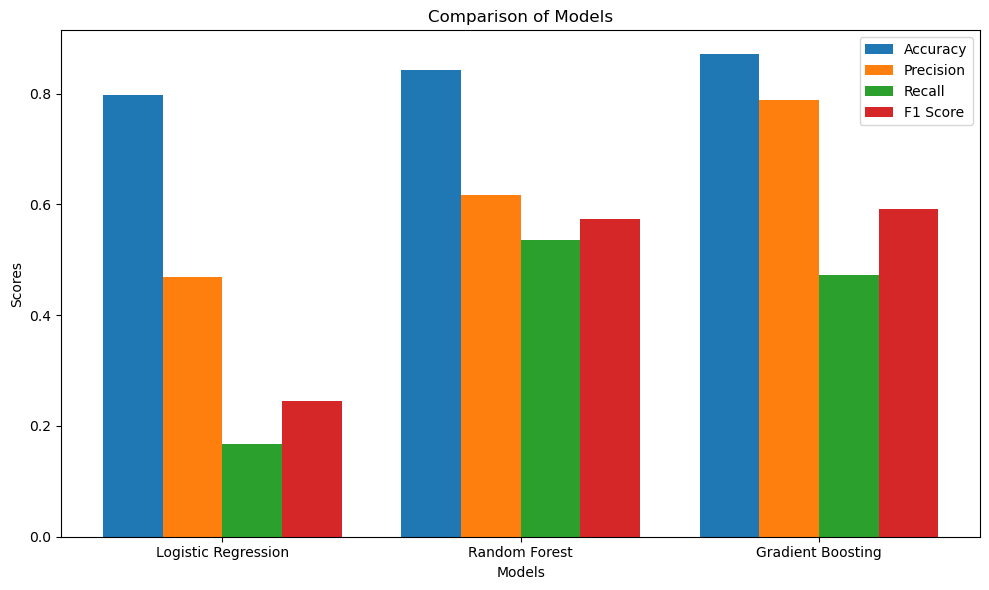

In [65]:
#Compare models visualization
models = {
    'Logistic Regression':LR_clf,
    'Random Forest':rfc_clf_smote,
    'Gradient Boosting':gbc_clf
}
metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)


    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T
# Create a bar chart to compare the models
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis labels (models)
models = metrics_df.index

# Bar chart data
accuracy = metrics_df['Accuracy']
precision = metrics_df['Precision']
recall = metrics_df['Recall']
f1 = metrics_df['F1 Score']

bar_width = 0.2
index = np.arange(len(models))

# Plot each metric as a bar
ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar(index + bar_width, precision, bar_width, label='Precision')
ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
ax.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

In [66]:
#Questions for Hussnain
#Different encoding needed, eg reading about label encoding(low,medium, high)